In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd drive/MyDrive

/content/drive/MyDrive


# Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Data and Describing Data


In [253]:
# 1. Load Dataset
df_train = pd.read_csv('train.csv')

In [254]:
# 2. Check Infomation of the DS and Type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1582 non-null   object 
 12  Max Power           1582 non-null   object 
 13  Max Torque          1582 non-null   object 
 14  Drivetrain          1536 non-null   object 
 15  Length              1595 non-null   float64
 16  Width 

In [255]:
# 3. Quick Review
df_train.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,Individual,1995 cc,184 bhp @ 4000 rpm,350 Nm @ 1750 rpm,RWD,4454.0,2044.0,1545.0,5.0,63.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,Individual,1997 cc,138 bhp @ 3750 rpm,320 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,Individual,2925 cc,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,Individual,2755 cc,174 bhp @ 3400 rpm,450 Nm @ 1600 rpm,RWD,4795.0,1855.0,1835.0,7.0,80.0


In [256]:
# 4. Descriptive Statistics
df_train.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.647000e+03,1647.000000,1.647000e+03,1595.00000,1595.000000,1595.000000,1595.000000,1557.000000
mean,1.696655e+06,2016.419551,5.420636e+04,4281.47837,1767.580564,1592.423824,5.310345,52.154656
std,2.360649e+06,3.370327,5.849584e+04,448.16458,137.053924,136.360967,0.816002,15.405199
min,4.900000e+04,1988.000000,0.000000e+00,3099.00000,1475.000000,1165.000000,2.000000,15.000000
25%,4.775000e+05,2014.000000,2.900000e+04,3985.00000,1695.000000,1485.000000,5.000000,40.000000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.00000,1775.000000,1550.000000,5.000000,50.000000
75%,1.950000e+06,2019.000000,7.200000e+04,4630.00000,1835.000000,1675.000000,5.000000,60.000000
max,2.750000e+07,2022.000000,2.000000e+06,5569.00000,2220.000000,1995.000000,8.000000,105.000000


# Exploratory Data Analysis On Numerical Columns

---



## Chuyển cột Seating Capacity thành int64 vì đây là cột cateforical[văn bản liên

In [257]:
df_train["Seating Capacity"].unique()

array([nan,  5.,  7.,  2.,  6.,  8.,  4.])

In [258]:
# Fill with mode value
df_train["Seating Capacity"].fillna(df_train["Seating Capacity"].mode()[0], inplace=True)

In [259]:
# Convert dtype to int64
df_train["Seating Capacity"] = df_train["Seating Capacity"].astype("int64")

## Xem xét các cột object nhưng chứa dữ liệu float64

In [260]:
for col in ['Engine', 'Max Power', 'Max Torque', 'Fuel Tank Capacity']:
    print(f"\nColumn: {col}")
    print(df_train[col].unique()[:20])


Column: Engine
[nan '1995 cc' '1997 cc' '2925 cc' '2755 cc' '1248 cc' '1950 cc' '2993 cc'
 '1498 cc' '1497 cc' '1396 cc' '1984 cc' '2179 cc' '1956 cc' '1461 cc'
 '1998 cc' '1582 cc' '1797 cc' '1968 cc' '998 cc']

Column: Max Power
[nan '184 bhp @ 4000 rpm' '138 bhp @ 3750 rpm' '326 bhp @ 3600 rpm'
 '174 bhp @ 3400 rpm' '89 bhp @ 4000 rpm' '74 bhp @ 4000 rpm'
 '192 bhp @ 3800 rpm' '244 bhp @ 4000 rpm' '99 bhp @ 3750 rpm'
 '117 bhp @ 6600 rpm' '165 bhp @ 3500 rpm' '138 bhp @ 4000 rpm'
 '169 bhp @ 3750 rpm' '188 bhp @ 3500 rpm' '84 bhp @ 3750 rpm'
 '248 bhp @ 5200 rpm' '126 bhp @ 4000 rpm' '147 bhp @ 6500 rpm'
 '188 bhp @ 4200 rpm']

Column: Max Torque
[nan '350 Nm @ 1750 rpm' '320 Nm @ 1600 rpm' '700 Nm @ 1200 rpm'
 '450 Nm @ 1600 rpm' '200 Nm @ 1750 rpm' '190 Nm @ 2000 rpm'
 '400 Nm @ 1600 rpm' '600 Nm @ 2000 rpm' '205 Nm @ 1750 rpm'
 '145 Nm @ 4600 rpm' '224 Nm @ 1500 rpm' '400 Nm @ 2750 rpm'
 '320 Nm @ 1700 rpm' '420 Nm @ 1750 rpm' '200 Nm @ 1900 rpm'
 '350 Nm @ 1450 rpm' '260 Nm @ 1

- Các cột `Engine`, `Max Power`, `Max Torque` chứa những thông tin quan trọng có dạng số thực

In [261]:
# Split 'Max Power'
df_train[['Max_Power_Value', 'Max_Power_RPM']] = df_train['Max Power'].str.split('@', expand=True)
df_train['Max_Power_RPM'] = df_train['Max_Power_RPM'].str.strip().str.replace('rpm', '', regex=False)
df_train['Max_Power_Value'] = df_train['Max_Power_Value'].str.replace(r'[^\d.]+', '', regex=True)


# Split 'Max Torque'
df_train[['Max_Torque_Value', 'Max_Torque_RPM']] = df_train['Max Torque'].str.split('@', expand=True)
df_train['Max_Torque_RPM'] = df_train['Max_Torque_RPM'].str.strip().str.replace('rpm', '', regex=False)
df_train['Max_Torque_Value'] = df_train['Max_Torque_Value'].str.replace(r'[^\d.]+', '', regex=True)


# Convert to numeric, handling errors
for col in ['Max_Power_Value', 'Max_Torque_Value']:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')

df_train['Engine_Value'] = df_train['Engine'].str.replace('cc', '').astype(float)
df_train['Engine_Value'] = pd.to_numeric(df_train['Engine'].str.replace('cc', ''), errors='coerce')

# Inspect the new columns
print(df_train[['Engine_Value', 'Max_Power_Value', 'Max_Power_RPM', 'Max_Torque_Value', 'Max_Torque_RPM']].info())
print(df_train[['Engine_Value', 'Max_Power_Value', 'Max_Power_RPM', 'Max_Torque_Value', 'Max_Torque_RPM']].head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine_Value      1582 non-null   float64
 1   Max_Power_Value   1582 non-null   float64
 2   Max_Power_RPM     1582 non-null   object 
 3   Max_Torque_Value  1582 non-null   float64
 4   Max_Torque_RPM    1582 non-null   object 
dtypes: float64(3), object(2)
memory usage: 64.5+ KB
None
    Engine_Value  Max_Power_Value Max_Power_RPM  Max_Torque_Value  \
0            NaN              NaN           NaN               NaN   
1         1995.0            184.0         4000              350.0   
2         1997.0            138.0         3750              320.0   
3         2925.0            326.0         3600              700.0   
4         2755.0            174.0         3400              450.0   
5         1248.0             89.0         4000              200.0   
6         1248.0        

In [262]:
# for col in ['Engine_Value', 'Max_Power_Value', 'Max_Torque_Value', 'Engine_Value']:
#     median_value = df_train[col].median()
#     df_train[col].fillna(median_value, inplace=True)
#     print(f"Median of {col}: {median_value}")
#     print(f"Filled NaN values in {col} with: {median_value}")

In [263]:
# Drop Engine Max_Power Max Torque columns
df_train.drop(['Engine', 'Max Power', 'Max Torque'], axis=1, inplace=True)

In [264]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Drivetrain          1536 non-null   object 
 12  Length              1595 non-null   float64
 13  Width               1595 non-null   float64
 14  Height              1595 non-null   float64
 15  Seating Capacity    1647 non-null   int64  
 16  Fuel T

## Tổng quan về các cột numerical

In [265]:
# 1. Identify all numerical columns
numerical_cols = df_train.select_dtypes(include=np.number).columns.tolist()
print(f"\nIdentified {len(numerical_cols)} numerical columns.")
# print(f"Numerical columns: {numerical_cols}") # Optional: print all


Identified 11 numerical columns.



Found 7 numerical columns with missing values:
Length                52
Width                 52
Height                52
Fuel Tank Capacity    90
Max_Power_Value       65
Max_Torque_Value      65
Engine_Value          65
dtype: int64

--- Distribution Analysis for Numerical Columns with Missing Data ---

--- Analyzing Column: 'Length' ---
  Missing Values: 52 (3.16%)
  Skewness: -0.02
  Mean: 4281.48
  Median: 4370.00


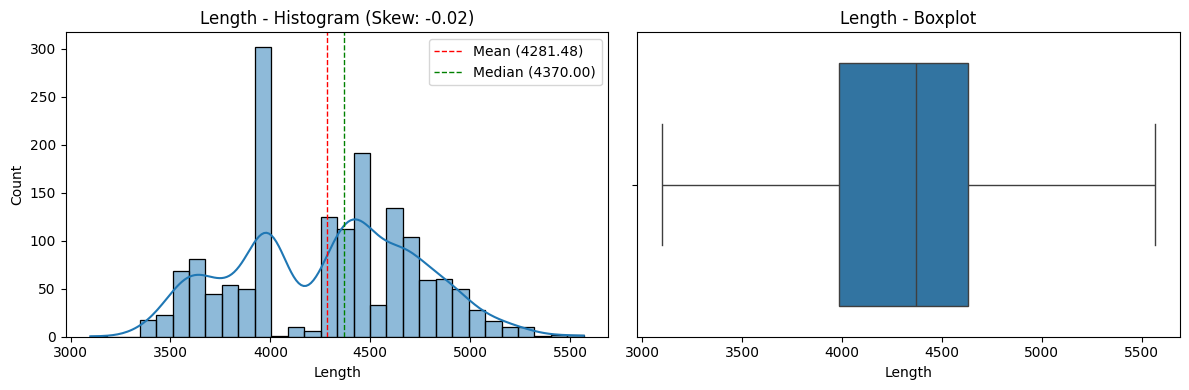


--- Analyzing Column: 'Width' ---
  Missing Values: 52 (3.16%)
  Skewness: 0.30
  Mean: 1767.58
  Median: 1775.00


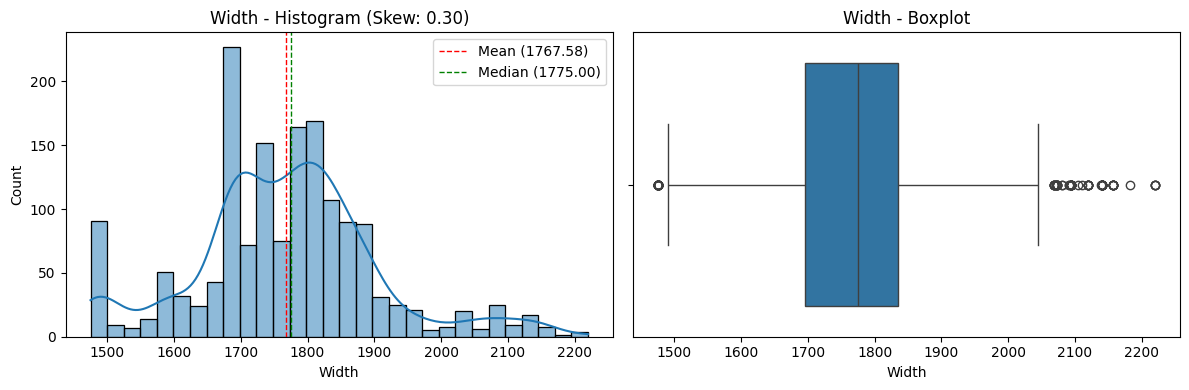


--- Analyzing Column: 'Height' ---
  Missing Values: 52 (3.16%)
  Skewness: 0.85
  Mean: 1592.42
  Median: 1550.00


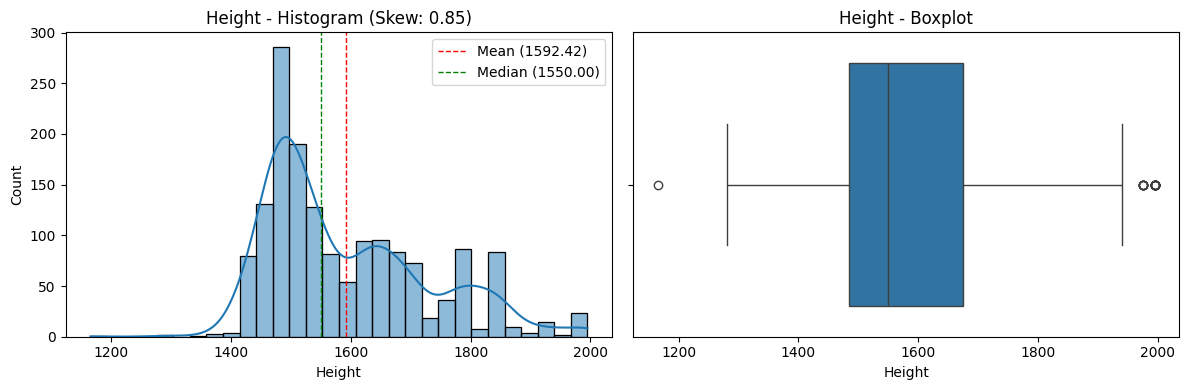


--- Analyzing Column: 'Fuel Tank Capacity' ---
  Missing Values: 90 (5.46%)
  Skewness: 0.82
  Mean: 52.15
  Median: 50.00


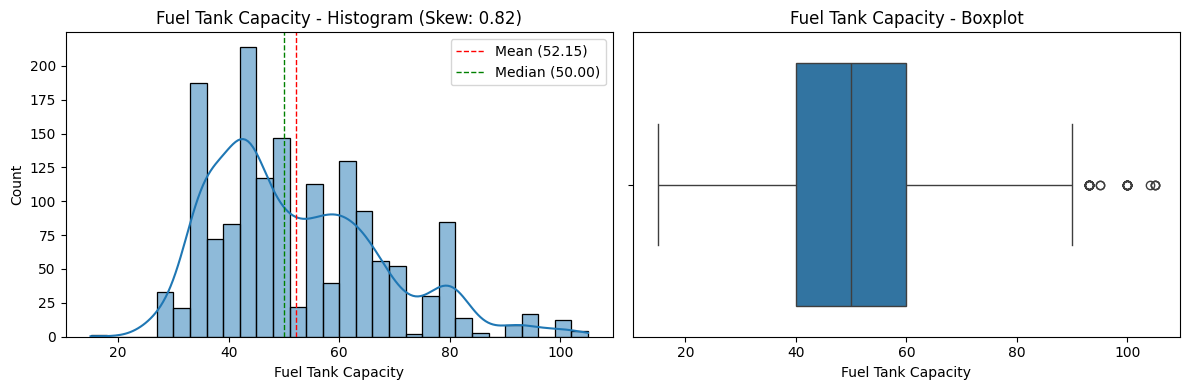


--- Analyzing Column: 'Max_Power_Value' ---
  Missing Values: 65 (3.95%)
  Skewness: 2.01
  Mean: 129.90
  Median: 117.00


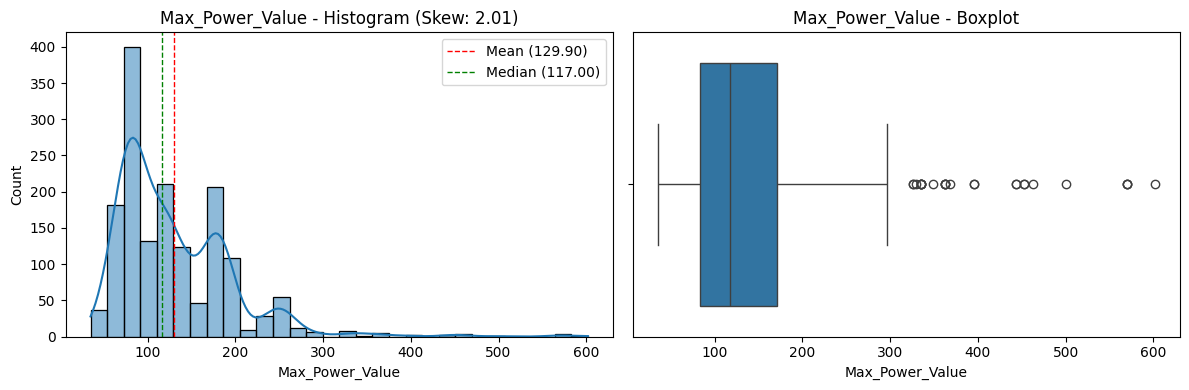


--- Analyzing Column: 'Max_Torque_Value' ---
  Missing Values: 65 (3.95%)
  Skewness: 0.89
  Mean: 246.48
  Median: 200.00


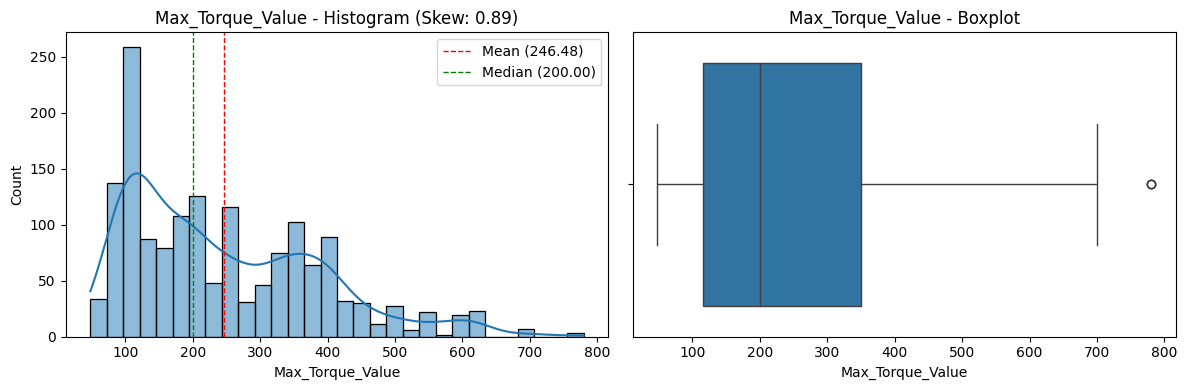


--- Analyzing Column: 'Engine_Value' ---
  Missing Values: 65 (3.95%)
  Skewness: 1.86
  Mean: 1701.67
  Median: 1498.00


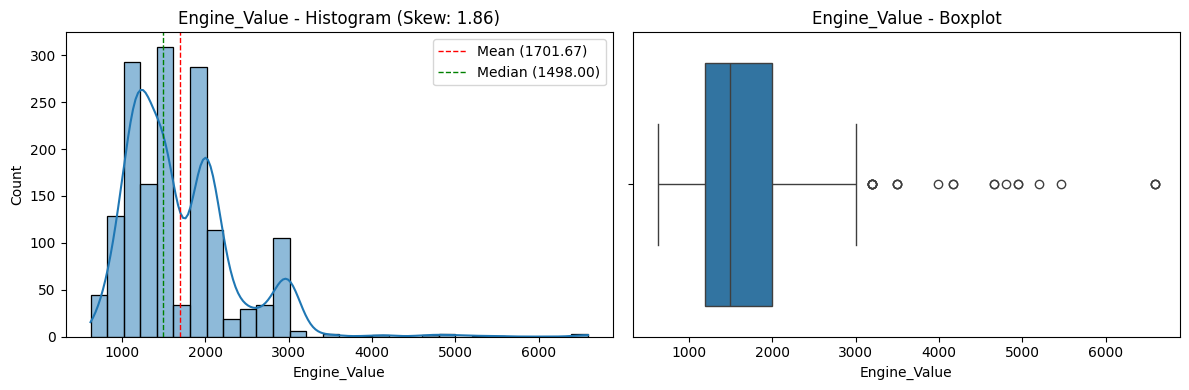

In [266]:
# 2. Analyze Distribution of Affected Columns:
missing_info = df_train[numerical_cols].isnull().sum()
missing_numerical_cols = missing_info[missing_info > 0]

if missing_numerical_cols.empty:
    print("\nCongratulations! No missing values found in any numerical columns.")
else:
    print(f"\nFound {len(missing_numerical_cols)} numerical columns with missing values:")
    print(missing_numerical_cols)

    # 3. Analyze each column with missing values
    print("\n--- Distribution Analysis for Numerical Columns with Missing Data ---")
    for col in missing_numerical_cols.index:
        missing_count = missing_numerical_cols[col]
        total_count = len(df_train)
        missing_percentage = (missing_count / total_count) * 100
        skewness = df_train[col].skew()
        mean_val = df_train[col].mean()
        median_val = df_train[col].median()

        print(f"\n--- Analyzing Column: '{col}' ---")
        print(f"  Missing Values: {missing_count} ({missing_percentage:.2f}%)")
        print(f"  Skewness: {skewness:.2f}")
        print(f"  Mean: {mean_val:.2f}")
        print(f"  Median: {median_val:.2f}")

        # Plotting distribution
        plt.figure(figsize=(12, 4))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df_train[col], kde=True, bins=30)
        plt.title(f'{col} - Histogram (Skew: {skewness:.2f})')
        # Add vertical lines for mean and median
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean ({mean_val:.2f})')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median ({median_val:.2f})')
        plt.legend()


        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df_train[col])
        plt.title(f'{col} - Boxplot')

        plt.tight_layout()
        plt.show()

## Xử lý cột Max_Torque_Value

Phân phối: Lệch phải (skewness = 0.89), phân phối bimodal \\
Missing values: Fill bằng median (200.00) vì ít bị ảnh hưởng bởi outliers \\
Xử lý outlier: Sử dụng cắt IQR (Winsorization) để đưa giá trị >700 về giới hạn trên

In [267]:
print("--- Phân tích cột Max_Torque_Value trước khi xử lý ---")
print(f"Số lượng giá trị thiếu: {df_train['Max_Torque_Value'].isna().sum()} ({df_train['Max_Torque_Value'].isna().mean() * 100:.2f}%)")
print(f"Trung bình: {df_train['Max_Torque_Value'].mean():.2f}")
print(f"Trung vị: {df_train['Max_Torque_Value'].median():.2f}")
print(f"Độ lệch (skewness): {df_train['Max_Torque_Value'].skew():.2f}")

--- Phân tích cột Max_Torque_Value trước khi xử lý ---
Số lượng giá trị thiếu: 65 (3.95%)
Trung bình: 246.48
Trung vị: 200.00
Độ lệch (skewness): 0.89


In [268]:
median_value = df_train['Max_Torque_Value'].median()
print(f"\nĐiền missing values bằng giá trị trung vị: {median_value:.2f}")


Điền missing values bằng giá trị trung vị: 200.00


In [269]:
# Tạo một bản sao để giữ dữ liệu gốc
df_processed = df_train.copy()
df_processed['Max_Torque_Value'] = df_processed['Max_Torque_Value'].fillna(median_value)

In [270]:
# XỬ LÝ OUTLIERS sử dụng IQR method
Q1 = df_processed['Max_Torque_Value'].quantile(0.25)
Q3 = df_processed['Max_Torque_Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nXử lý outliers:")
print(f"Q1 (25%): {Q1:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")


Xử lý outliers:
Q1 (25%): 115.00
Q3 (75%): 343.00
IQR: 228.00
Lower bound: -227.00
Upper bound: 685.00


In [271]:
# Đếm số lượng outliers
n_outliers_below = (df_processed['Max_Torque_Value'] < lower_bound).sum()
n_outliers_above = (df_processed['Max_Torque_Value'] > upper_bound).sum()
print(f"Số lượng outliers dưới lower bound: {n_outliers_below}")
print(f"Số lượng outliers trên upper bound: {n_outliers_above}")
print(f"Tổng số outliers: {n_outliers_below + n_outliers_above} ({(n_outliers_below + n_outliers_above) / len(df_processed) * 100:.2f}%)")

Số lượng outliers dưới lower bound: 0
Số lượng outliers trên upper bound: 10
Tổng số outliers: 10 (0.61%)


In [272]:
df_processed['Max_Torque_Value_Winsorized'] = df_processed['Max_Torque_Value'].clip(lower=lower_bound, upper=upper_bound)

In [273]:
# SO SÁNH TRƯỚC VÀ SAU KHI XỬ LÝ
print("\n--- Thống kê sau khi xử lý ---")
print("Dữ liệu ban đầu (có missing, có outliers):")
print(df_train['Max_Torque_Value'].describe())

print("\nDữ liệu sau khi điền missing values:")
print(df_processed['Max_Torque_Value'].describe())

print("\nDữ liệu sau khi điền missing values và xử lý outliers (Winsorization):")
print(df_processed['Max_Torque_Value_Winsorized'].describe())

print("\nSo sánh độ lệch (skewness):")
print(f"Ban đầu: {df_train['Max_Torque_Value'].skew():.2f}")
print(f"Sau khi điền missing values: {df_processed['Max_Torque_Value'].skew():.2f}")
print(f"Sau khi xử lý outliers: {df_processed['Max_Torque_Value_Winsorized'].skew():.2f}")


--- Thống kê sau khi xử lý ---
Dữ liệu ban đầu (có missing, có outliers):
count    1582.000000
mean      246.475766
std       141.843687
min        48.000000
25%       115.000000
50%       200.000000
75%       350.000000
max       780.000000
Name: Max_Torque_Value, dtype: float64

Dữ liệu sau khi điền missing values:
count    1647.000000
mean      244.641567
std       139.309171
min        48.000000
25%       115.000000
50%       200.000000
75%       343.000000
max       780.000000
Name: Max_Torque_Value, dtype: float64

Dữ liệu sau khi điền missing values và xử lý outliers (Winsorization):
count    1647.000000
mean      244.411452
std       138.516872
min        48.000000
25%       115.000000
50%       200.000000
75%       343.000000
max       685.000000
Name: Max_Torque_Value_Winsorized, dtype: float64

So sánh độ lệch (skewness):
Ban đầu: 0.89
Sau khi điền missing values: 0.94
Sau khi xử lý outliers: 0.90


In [274]:
df_train['Max_Torque_Value_Processed'] = df_processed['Max_Torque_Value_Winsorized']

In [275]:
# Thay thế cột gốc bằng cột đã xử lý nếu cần

df_train['Max_Torque_Value'] = df_train['Max_Torque_Value_Processed']
df_train.drop(columns=['Max_Torque_Value_Processed'], inplace=True)

## Xử lý cột `Engine_Value`

Phân phối: Lệch phải đáng kể (skewness = 1.86), nhiều đỉnh (multimodal) \\
Missing values: Fill bằng median (1498.00), chênh lệch lớn với mean (1701.67) \\
Xử lý outlier: Log transformation trước, sau đó áp dụng IQR để xử lý outliers ở vùng >3000

In [276]:
# Tạo copy để xử lý riêng
df = df_train.copy()
print("--- Phân tích cột Engine_Value trước khi xử lý ---")
print(f"Số lượng giá trị thiếu: {df_train['Engine_Value'].isna().sum()} ({df['Engine_Value'].isna().mean() * 100:.2f}%)")
print(f"Trung bình: {df['Engine_Value'].mean():.2f}")
print(f"Trung vị: {df['Engine_Value'].median():.2f}")
print(f"Độ lệch (skewness): {df['Engine_Value'].skew():.2f}")

# Mô tả thống kê cơ bản
print("\nThống kê mô tả:")
print(df['Engine_Value'].describe)

--- Phân tích cột Engine_Value trước khi xử lý ---
Số lượng giá trị thiếu: 65 (3.95%)
Trung bình: 1701.67
Trung vị: 1498.00
Độ lệch (skewness): 1.86

Thống kê mô tả:
<bound method NDFrame.describe of 0          NaN
1       1995.0
2       1997.0
3       2925.0
4       2755.0
         ...  
1642    1248.0
1643       NaN
1644     998.0
1645    1995.0
1646    1196.0
Name: Engine_Value, Length: 1647, dtype: float64>


In [277]:
median_value = df['Engine_Value'].median()
print(f"\nĐiền missing values bằng giá trị trung vị: {median_value:.2f}")

# Tạo một bản sao để giữ dữ liệu gốc
df_processed = df.copy()
df_processed['Engine_Value'] = df_processed['Engine_Value'].fillna(median_value)


Điền missing values bằng giá trị trung vị: 1498.00


In [278]:
min_value = df_processed['Engine_Value'].min()
print(f"\nGiá trị nhỏ nhất: {min_value:.2f}")

# Áp dụng log transformation (với dữ liệu này không cần shift vì không có giá trị âm/0)
df_processed['Engine_Value_Log'] = np.log(df_processed['Engine_Value'])


Giá trị nhỏ nhất: 624.00


In [279]:
print("\nSo sánh độ lệch trước và sau khi áp dụng log transformation:")
print(f"Skewness ban đầu: {df_processed['Engine_Value'].skew():.2f}")
print(f"Skewness sau log: {df_processed['Engine_Value_Log'].skew():.2f}")


So sánh độ lệch trước và sau khi áp dụng log transformation:
Skewness ban đầu: 1.93
Skewness sau log: 0.44


In [280]:
print(f"\nXử lý outliers trên dữ liệu đã log:")
print(f"Q1 (25%): {Q1:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# Đếm số lượng outliers
n_outliers_below = (df_processed['Engine_Value_Log'] < lower_bound).sum()
n_outliers_above = (df_processed['Engine_Value_Log'] > upper_bound).sum()
print(f"Số lượng outliers dưới lower bound: {n_outliers_below}")
print(f"Số lượng outliers trên upper bound: {n_outliers_above}")
print(f"Tổng số outliers: {n_outliers_below + n_outliers_above} ({(n_outliers_below + n_outliers_above) / len(df_processed) * 100:.2f}%)")

# Áp dụng Winsorization (cắt outliers về giới hạn)
df_processed['Engine_Value_Log_Winsorized'] = df_processed['Engine_Value_Log'].clip(lower=lower_bound, upper=upper_bound)

# Chuyển đổi ngược lại từ log để có giá trị gốc đã được xử lý
df_processed['Engine_Value_Processed'] = np.exp(df_processed['Engine_Value_Log_Winsorized'])


Xử lý outliers trên dữ liệu đã log:
Q1 (25%): 115.00
Q3 (75%): 343.00
IQR: 228.00
Lower bound: -227.00
Upper bound: 685.00
Số lượng outliers dưới lower bound: 0
Số lượng outliers trên upper bound: 0
Tổng số outliers: 0 (0.00%)


In [281]:
# SO SÁNH TRƯỚC VÀ SAU KHI XỬ LÝ
print("\n--- Thống kê sau khi xử lý ---")
print("Dữ liệu ban đầu (có missing, có outliers):")
print(df['Engine_Value'].describe())

print("\nDữ liệu sau khi điền missing values:")
print(df_processed['Engine_Value'].describe())

print("\nDữ liệu sau khi log transformation (đã điền missing):")
print(df_processed['Engine_Value_Log'].describe())

print("\nDữ liệu sau khi xử lý toàn bộ (điền missing, log, xử lý outliers, chuyển đổi ngược lại):")
print(df_processed['Engine_Value_Processed'].describe())


--- Thống kê sau khi xử lý ---
Dữ liệu ban đầu (có missing, có outliers):
count    1582.000000
mean     1701.665613
std       659.143134
min       624.000000
25%      1197.000000
50%      1498.000000
75%      1995.000000
max      6592.000000
Name: Engine_Value, dtype: float64

Dữ liệu sau khi điền missing values:
count    1647.000000
mean     1693.627808
std       647.214014
min       624.000000
25%      1198.000000
50%      1498.000000
75%      1995.000000
max      6592.000000
Name: Engine_Value, dtype: float64

Dữ liệu sau khi log transformation (đã điền missing):
count    1647.000000
mean        7.373396
std         0.341232
min         6.436150
25%         7.088409
50%         7.311886
75%         7.598399
max         8.793612
Name: Engine_Value_Log, dtype: float64

Dữ liệu sau khi xử lý toàn bộ (điền missing, log, xử lý outliers, chuyển đổi ngược lại):
count    1647.000000
mean     1693.627808
std       647.214014
min       624.000000
25%      1198.000000
50%      1498.000000
75%

In [282]:
df['Engine_Value_Processed'] = df_processed['Engine_Value_Processed']
df_train["Engine_Value"] = df["Engine_Value_Processed"]

## Xử lý cột width

Phân phối: Gần chuẩn hơn (skewness = 0.30), nhiều đỉnh nhỏ \\
Missing values: Có thể dùng median (1775.00) hoặc mean (1767.58) \\
Xử lý outlier: Cắt IQR cho các giá trị <1500 và >2100, hoặc giữ lại và áp dụng RobustScaler khi modeling

In [283]:
df = df_train.copy()
print("--- Phân tích cột Width trước khi xử lý ---")
print(f"Số lượng giá trị thiếu: {df['Width'].isna().sum()} ({df['Width'].isna().mean() * 100:.2f}%)")
print(f"Trung bình: {df['Width'].mean():.2f}")
print(f"Trung vị: {df['Width'].median():.2f}")
print(f"Độ lệch (skewness): {df['Width'].skew():.2f}")

# Mô tả thống kê cơ bản
print("\nThống kê mô tả:")
print(df['Width'].describe())

--- Phân tích cột Width trước khi xử lý ---
Số lượng giá trị thiếu: 52 (3.16%)
Trung bình: 1767.58
Trung vị: 1775.00
Độ lệch (skewness): 0.30

Thống kê mô tả:
count    1595.000000
mean     1767.580564
std       137.053924
min      1475.000000
25%      1695.000000
50%      1775.000000
75%      1835.000000
max      2220.000000
Name: Width, dtype: float64


In [284]:
median_value = df['Width'].median()
print(f"\nĐiền missing values bằng giá trị trung vị: {median_value:.2f}")

# Tạo một bản sao để giữ dữ liệu gốc
df_processed = df.copy()
df_processed['Width'] = df_processed['Width'].fillna(median_value)


Điền missing values bằng giá trị trung vị: 1775.00


In [285]:
Q1 = df_processed['Width'].quantile(0.25)
Q3 = df_processed['Width'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nXử lý outliers:")
print(f"Q1 (25%): {Q1:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# Đếm số lượng outliers
n_outliers_below = (df_processed['Width'] < lower_bound).sum()
n_outliers_above = (df_processed['Width'] > upper_bound).sum()
print(f"Số lượng outliers dưới lower bound: {n_outliers_below}")
print(f"Số lượng outliers trên upper bound: {n_outliers_above}")
print(f"Tổng số outliers: {n_outliers_below + n_outliers_above} ({(n_outliers_below + n_outliers_above) / len(df_processed) * 100:.2f}%)")

# Áp dụng Winsorization (cắt outliers về giới hạn)
df_processed['Width_Winsorized'] = df_processed['Width'].clip(lower=lower_bound, upper=upper_bound)


Xử lý outliers:
Q1 (25%): 1695.00
Q3 (75%): 1831.00
IQR: 136.00
Lower bound: 1491.00
Upper bound: 2035.00
Số lượng outliers dưới lower bound: 67
Số lượng outliers trên upper bound: 84
Tổng số outliers: 151 (9.17%)


In [286]:
print("\n--- Thống kê sau khi xử lý ---")
print("Dữ liệu ban đầu (có missing, có outliers):")
print(df['Width'].describe())

print("\nDữ liệu sau khi điền missing values:")
print(df_processed['Width'].describe())

print("\nDữ liệu sau khi điền missing values và xử lý outliers (Winsorization):")
print(df_processed['Width_Winsorized'].describe())

print("\nSo sánh độ lệch (skewness):")
print(f"Ban đầu: {df['Width'].skew():.2f}")
print(f"Sau khi điền missing values: {df_processed['Width'].skew():.2f}")
print(f"Sau khi xử lý outliers: {df_processed['Width_Winsorized'].skew():.2f}")


--- Thống kê sau khi xử lý ---
Dữ liệu ban đầu (có missing, có outliers):
count    1595.000000
mean     1767.580564
std       137.053924
min      1475.000000
25%      1695.000000
50%      1775.000000
75%      1835.000000
max      2220.000000
Name: Width, dtype: float64

Dữ liệu sau khi điền missing values:
count    1647.000000
mean     1767.814815
std       134.877908
min      1475.000000
25%      1695.000000
50%      1775.000000
75%      1831.000000
max      2220.000000
Name: Width, dtype: float64

Dữ liệu sau khi điền missing values và xử lý outliers (Winsorization):
count    1647.000000
mean     1764.576199
std       125.042457
min      1491.000000
25%      1695.000000
50%      1775.000000
75%      1831.000000
max      2035.000000
Name: Width_Winsorized, dtype: float64

So sánh độ lệch (skewness):
Ban đầu: 0.30
Sau khi điền missing values: 0.30
Sau khi xử lý outliers: -0.07


In [287]:
df['Width_Processed'] = df_processed['Width_Winsorized']
df_train["Width"] = df["Width_Processed"]

## Xử lý cột `Max_Power_Value`


Xử lý outliers:
Q1 (25%): 4.42
Q3 (75%): 5.13
IQR: 0.71
Lower bound: 3.35
Upper bound: 6.20


<Axes: >

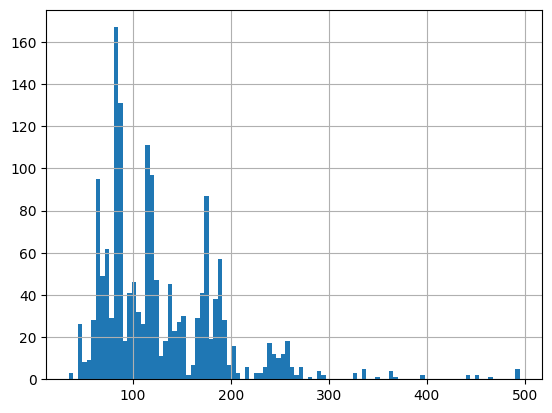

In [288]:
df = df_train.copy()
df['Max_Power_Value'] = df['Max_Power_Value'].fillna(df['Max_Power_Value'].median())
df['Max_Power_Value_Log'] = np.log(df['Max_Power_Value'])
Q1 = df['Max_Power_Value_Log'].quantile(0.25)
Q3 = df['Max_Power_Value_Log'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nXử lý outliers:")
print(f"Q1 (25%): {Q1:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

df['Max_Power_Value_Log_Processed'] = df['Max_Power_Value_Log'].clip(lower=lower_bound, upper=upper_bound)
df['Max_Power_Value_Processed'] = np.exp(df['Max_Power_Value_Log_Processed'])
df_train['Max_Power_Value'] = df['Max_Power_Value_Processed']
df_train['Max_Power_Value'].hist(bins=100)

## Xử lý các cột bị null còn lại


Found 3 numerical columns with missing values:
Length                52
Height                52
Fuel Tank Capacity    90
dtype: int64

--- Distribution Analysis for Numerical Columns with Missing Data ---

--- Analyzing Column: 'Length' ---
  Missing Values: 52 (3.16%)
  Skewness: -0.02
  Mean: 4281.48
  Median: 4370.00


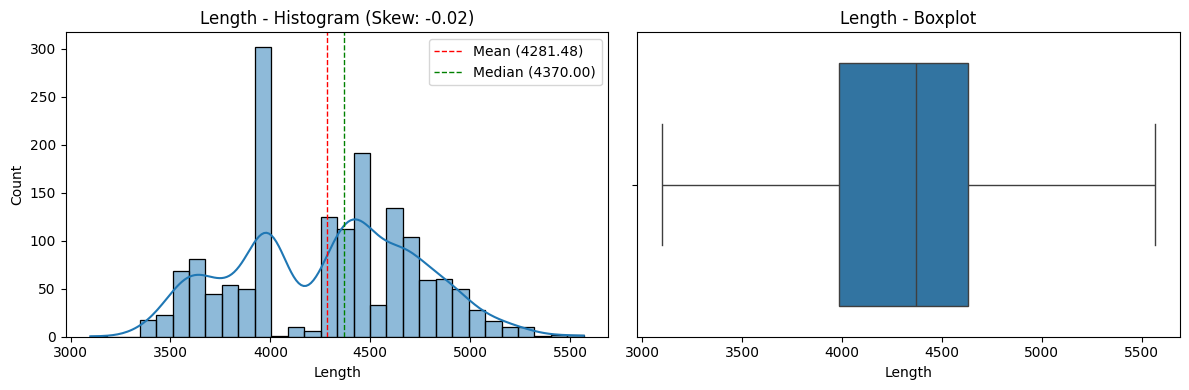


--- Analyzing Column: 'Height' ---
  Missing Values: 52 (3.16%)
  Skewness: 0.85
  Mean: 1592.42
  Median: 1550.00


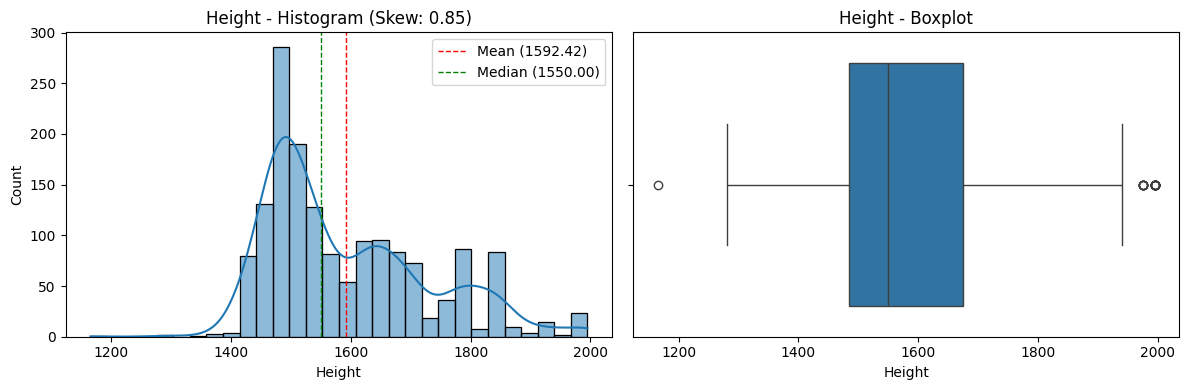


--- Analyzing Column: 'Fuel Tank Capacity' ---
  Missing Values: 90 (5.46%)
  Skewness: 0.82
  Mean: 52.15
  Median: 50.00


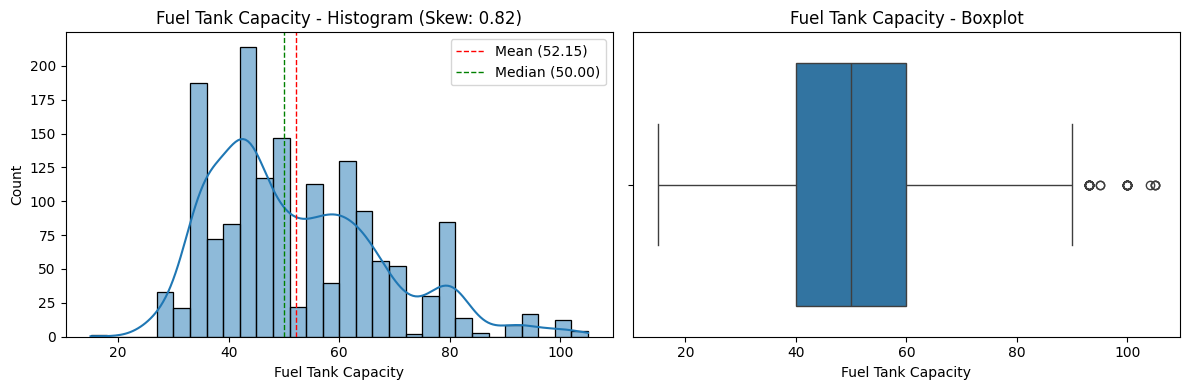

In [289]:
# 2. Analyze Distribution of Affected Columns:
missing_info = df_train[numerical_cols].isnull().sum()
missing_numerical_cols = missing_info[missing_info > 0]

if missing_numerical_cols.empty:
    print("\nCongratulations! No missing values found in any numerical columns.")
else:
    print(f"\nFound {len(missing_numerical_cols)} numerical columns with missing values:")
    print(missing_numerical_cols)

    # 3. Analyze each column with missing values
    print("\n--- Distribution Analysis for Numerical Columns with Missing Data ---")
    for col in missing_numerical_cols.index:
        missing_count = missing_numerical_cols[col]
        total_count = len(df_train)
        missing_percentage = (missing_count / total_count) * 100
        skewness = df_train[col].skew()
        mean_val = df_train[col].mean()
        median_val = df_train[col].median()

        print(f"\n--- Analyzing Column: '{col}' ---")
        print(f"  Missing Values: {missing_count} ({missing_percentage:.2f}%)")
        print(f"  Skewness: {skewness:.2f}")
        print(f"  Mean: {mean_val:.2f}")
        print(f"  Median: {median_val:.2f}")

        # Plotting distribution
        plt.figure(figsize=(12, 4))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df_train[col], kde=True, bins=30)
        plt.title(f'{col} - Histogram (Skew: {skewness:.2f})')
        # Add vertical lines for mean and median
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean ({mean_val:.2f})')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median ({median_val:.2f})')
        plt.legend()


        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df_train[col])
        plt.title(f'{col} - Boxplot')

        plt.tight_layout()
        plt.show()

In [290]:
# Xử lý và chuyển đổi Max_Power_RPM
df_train['Max_Power_RPM'] = df_train['Max_Power_RPM'].str.strip().replace('', np.nan)
df_train['Max_Power_RPM'] = pd.to_numeric(df_train['Max_Power_RPM'], errors='coerce')

# Xử lý và chuyển đổi Max_Torque_RPM
df_train['Max_Torque_RPM'] = df_train['Max_Torque_RPM'].str.strip().replace('', np.nan)
df_train['Max_Torque_RPM'] = pd.to_numeric(df_train['Max_Torque_RPM'], errors='coerce')

In [291]:
df_train['Max_Power_RPM'].unique()

array([  nan, 4000., 3750., 3600., 3400., 3800., 6600., 3500., 5200.,
       6500., 4200., 6200., 6000., 5500., 3000., 4300., 2910., 6400.,
       5100., 5250., 5000., 5600., 3200., 6300., 3900., 5678., 5150.,
       8250., 4400., 5800., 6250., 5700., 5400., 3700., 4250., 4500.,
       5300., 4700.])

In [292]:
df_train['Max_Torque_RPM'].unique()

array([  nan, 1750., 1600., 1200., 2000., 4600., 1500., 2750., 1700.,
       1900., 1450., 4700., 3500., 4000., 1400., 4250., 4200., 2800.,
       1800., 4850., 4500., 1250., 3800., 4400., 4800., 3000., 2200.,
       1300., 2250., 2400., 3100., 4386., 2700., 1350., 2500., 1370.,
       3250., 3600., 3750., 4300., 1360., 5000., 3300., 2600., 1650.,
       3400., 1340., 2150., 6500., 4750.])


Found 2 numerical columns with missing values:
Max_Power_RPM     69
Max_Torque_RPM    65
dtype: int64

--- Distribution Analysis for Numerical Columns with Missing Data ---

--- Analyzing Column: 'Max_Power_RPM' ---
  Missing Values: 69 (4.19%)
  Skewness: 0.20
  Mean: 4828.77
  Median: 4200.00


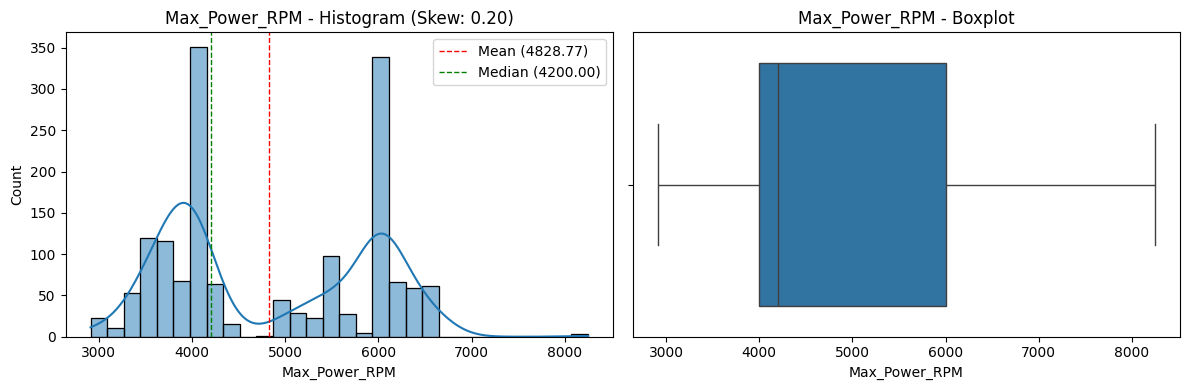


--- Analyzing Column: 'Max_Torque_RPM' ---
  Missing Values: 65 (3.95%)
  Skewness: 0.53
  Mean: 2621.88
  Median: 1900.00


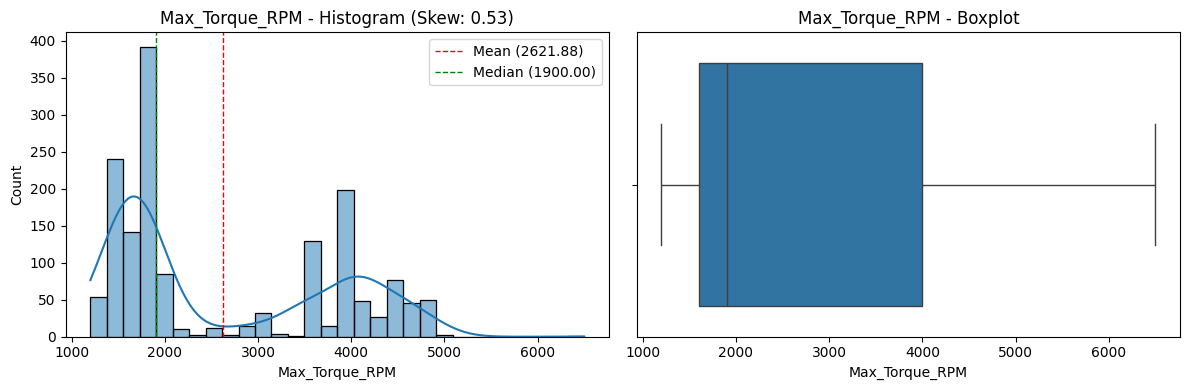

In [293]:
# 2. Analyze Distribution of Affected Columns:
missing_info = df_train[['Max_Power_RPM', 'Max_Torque_RPM']].isnull().sum()
missing_numerical_cols = missing_info[missing_info > 0]

if missing_numerical_cols.empty:
    print("\nCongratulations! No missing values found in any numerical columns.")
else:
    print(f"\nFound {len(missing_numerical_cols)} numerical columns with missing values:")
    print(missing_numerical_cols)

    # 3. Analyze each column with missing values
    print("\n--- Distribution Analysis for Numerical Columns with Missing Data ---")
    for col in missing_numerical_cols.index:
        missing_count = missing_numerical_cols[col]
        total_count = len(df_train)
        missing_percentage = (missing_count / total_count) * 100
        skewness = df_train[col].skew()
        mean_val = df_train[col].mean()
        median_val = df_train[col].median()

        print(f"\n--- Analyzing Column: '{col}' ---")
        print(f"  Missing Values: {missing_count} ({missing_percentage:.2f}%)")
        print(f"  Skewness: {skewness:.2f}")
        print(f"  Mean: {mean_val:.2f}")
        print(f"  Median: {median_val:.2f}")

        # Plotting distribution
        plt.figure(figsize=(12, 4))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df_train[col], kde=True, bins=30)
        plt.title(f'{col} - Histogram (Skew: {skewness:.2f})')
        # Add vertical lines for mean and median
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean ({mean_val:.2f})')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median ({median_val:.2f})')
        plt.legend()


        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df_train[col])
        plt.title(f'{col} - Boxplot')

        plt.tight_layout()
        plt.show()

In [294]:
# Điền missing values cho Max_Power_RPM
df_train['Max_Power_RPM'] = df_train['Max_Power_RPM'].fillna(df_train['Max_Power_RPM'].median())

# Điền missing values cho Max_Torque_RPM
df_train['Max_Torque_RPM'] = df_train['Max_Torque_RPM'].fillna(df_train['Max_Torque_RPM'].median())

In [295]:
missing_numerical_cols = ['Length', 'Height', 'Fuel Tank Capacity']
print(f"Columns to impute with median: {missing_numerical_cols}")

for col in missing_numerical_cols:
    # Calculate the median for the current column
    # Ensure we calculate median only on non-NaN values
    median_value = df_train[col].median()

    # Fill missing values (NaNs) with the calculated median
    df_train[col].fillna(median_value, inplace=True)

    print(f" -> Imputed '{col}' with median: {median_value:.2f}")

# --- Verification ---
print("\n--- Verification after Median Imputation ---")
remaining_missing = df_train[missing_numerical_cols].isnull().sum()
if remaining_missing.sum() == 0:
    print("Successfully imputed all identified numerical columns.")
    # Check missing values in the entire dataframe
    total_remaining_missing = df_train.isnull().sum().sum()
    if total_remaining_missing == 0:
        print("Congratulations! No missing values remaining in the entire DataFrame.")
    else:
            print(f"Warning: There are still {total_remaining_missing} missing values in other columns.")
            print(df_train.isnull().sum()[df_train.isnull().sum() > 0])

else:
    print("Warning: Some missing values remain in the imputed columns:")
    print(remaining_missing[remaining_missing > 0])

Columns to impute with median: ['Length', 'Height', 'Fuel Tank Capacity']
 -> Imputed 'Length' with median: 4370.00
 -> Imputed 'Height' with median: 1550.00
 -> Imputed 'Fuel Tank Capacity' with median: 50.00

--- Verification after Median Imputation ---
Successfully imputed all identified numerical columns.
Drivetrain    111
dtype: int64


In [296]:
df_train.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max_Power_Value,Max_Power_RPM,Max_Torque_Value,Max_Torque_RPM,Engine_Value
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,...,4370.0,1775.0,1550.0,5,50.0,117.0,4200.0,200.0,1900.0,1498.0
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,...,4454.0,2035.0,1545.0,5,63.0,184.0,4000.0,350.0,1750.0,1995.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,...,4585.0,1890.0,1785.0,7,70.0,138.0,3750.0,320.0,1600.0,1997.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,...,5207.0,2035.0,1823.0,7,90.0,326.0,3600.0,685.0,1200.0,2925.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,...,4795.0,1855.0,1835.0,7,80.0,174.0,3400.0,450.0,1600.0,2755.0



--- Analyzing Column: 'Kilometer' ---
  Skewness: 22.71
  Mean: 54206.36
  Median: 50000.00


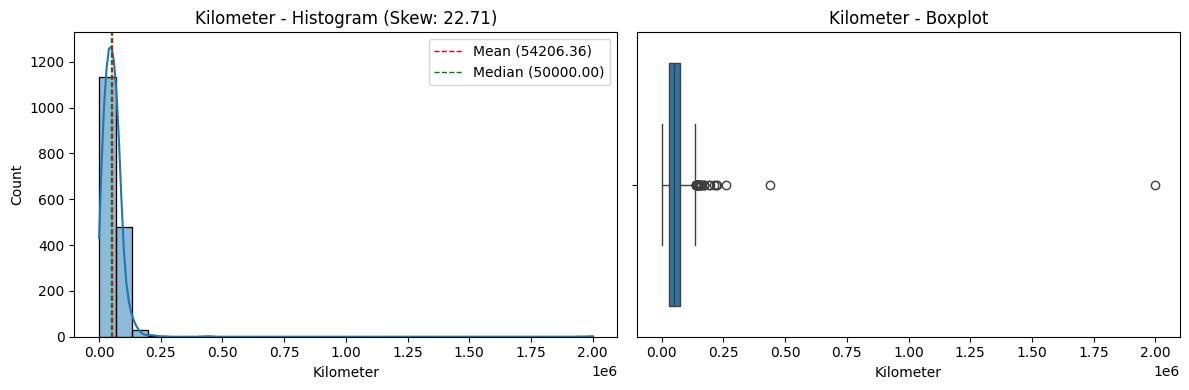

In [301]:
col = "Kilometer"
skewness = df_train[col].skew()
mean_val = df_train[col].mean()
median_val = df_train[col].median()

print(f"\n--- Analyzing Column: '{col}' ---")
print(f"  Skewness: {skewness:.2f}")
print(f"  Mean: {mean_val:.2f}")
print(f"  Median: {median_val:.2f}")

# Plotting distribution
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_train[col], kde=True, bins=30)
plt.title(f'{col} - Histogram (Skew: {skewness:.2f})')
# Add vertical lines for mean and median
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean ({mean_val:.2f})')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median ({median_val:.2f})')
plt.legend()


# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_train[col])
plt.title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()

In [302]:
df['Kilometer_Log'] = np.log1p(df['Kilometer'])  # log1p để tránh vấn đề với giá trị 0

# 2. Xác định outliers trong không gian log
Q1 = df['Kilometer_Log'].quantile(0.25)
Q3 = df['Kilometer_Log'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nXử lý outliers:")
print(f"Q1 (25%): {Q1:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# 3. Xử lý outliers
df['Kilometer_Log_Processed'] = df['Kilometer_Log'].clip(lower=lower_bound, upper=upper_bound)

# 4. Chuyển ngược về không gian ban đầu
df['Kilometer_Processed'] = np.expm1(df['Kilometer_Log_Processed'])


Xử lý outliers:
Q1 (25%): 10.28
Q3 (75%): 11.18
IQR: 0.91
Lower bound: 8.91
Upper bound: 12.55



--- Analyzing Column: 'Kilometer_Processed' ---
  Skewness: 1.36
  Mean: 53190.99
  Median: 50000.00


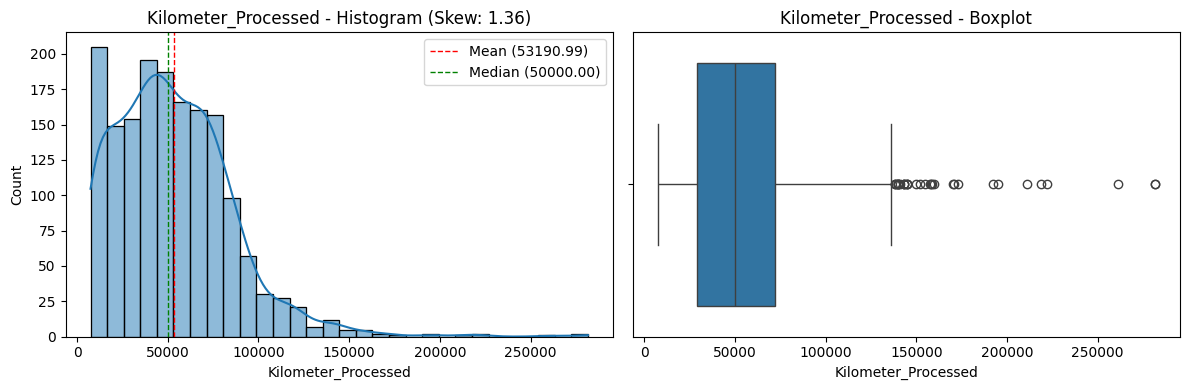

In [305]:
col = "Kilometer_Processed"
skewness = df[col].skew()
mean_val = df[col].mean()
median_val = df[col].median()

print(f"\n--- Analyzing Column: '{col}' ---")
print(f"  Skewness: {skewness:.2f}")
print(f"  Mean: {mean_val:.2f}")
print(f"  Median: {median_val:.2f}")

# Plotting distribution
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df[col], kde=True, bins=30)
plt.title(f'{col} - Histogram (Skew: {skewness:.2f})')
# Add vertical lines for mean and median
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean ({mean_val:.2f})')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median ({median_val:.2f})')
plt.legend()


# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df[col])
plt.title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()

In [306]:
df_train["Kilometer_Processed"] = df["Kilometer_Processed"]

## Save Temporary Data After Processing Numerical Columns

In [308]:
df_train.to_csv("train_numerical_processing.csv", index=False)

In [309]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 1647 non-null   object 
 1   Model                1647 non-null   object 
 2   Price                1647 non-null   int64  
 3   Year                 1647 non-null   int64  
 4   Kilometer            1647 non-null   int64  
 5   Fuel Type            1647 non-null   object 
 6   Transmission         1647 non-null   object 
 7   Location             1647 non-null   object 
 8   Color                1647 non-null   object 
 9   Owner                1647 non-null   object 
 10  Seller Type          1647 non-null   object 
 11  Drivetrain           1536 non-null   object 
 12  Length               1647 non-null   float64
 13  Width                1647 non-null   float64
 14  Height               1647 non-null   float64
 15  Seating Capacity     1647 non-null   i

In [307]:
df_train.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Width,Height,Seating Capacity,Fuel Tank Capacity,Max_Power_Value,Max_Power_RPM,Max_Torque_Value,Max_Torque_RPM,Engine_Value,Kilometer_Processed
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,...,1775.0,1550.0,5,50.0,117.0,4200.0,200.0,1900.0,1498.0,75576.000000
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,...,2035.0,1545.0,5,63.0,184.0,4000.0,350.0,1750.0,1995.0,77000.000000
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,...,1890.0,1785.0,7,70.0,138.0,3750.0,320.0,1600.0,1997.0,112000.000000
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,...,2035.0,1823.0,7,90.0,326.0,3600.0,685.0,1200.0,2925.0,7412.523028
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,...,1855.0,1835.0,7,80.0,174.0,3400.0,450.0,1600.0,2755.0,73000.000000
